# UMI vs Bulk Using random sampling

I have previously shown that using the bulk RNA-Seq data we can decide a cell cutoff for datasets 2 and 3 by adding cells ordered by UMI and calculating the correlation with bulk. As a sanity check I want to make sure that if I add cells in a random order I don't get a peak like we see in the ordered dataset. 

As we randomly sample cells, we start out at a very low correlation and then slowly increase as we add more cells. This supports the idea that we can use the ordered data to selection a cutoff.

In [11]:
import os
import sys
from pathlib import Path
from glob import glob

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb, Seurat
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory
from larval_gonad.cell_selection import cellranger_counts
from larval_gonad.bulk import read_bulk, TESTIS_BULK, scRNAseq_corr_distribution_random, plot_corr_distribution

# Setup notebook
nbconfig = Nb.setup_notebook()

last updated: 2018-03-27 
Git hash: 40b0d4a7726be1a0eb2f841aea6727eb18f56d32


In [2]:
mpl.style.use(['common', 'notebook'])

In [3]:
# Get single cell data ready
t1 = Seurat('../output/testis1')
umi1 = pd.read_parquet('../output/testis1/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw1 = cellranger_counts('../output/testis1/outs/raw_gene_bc_matrices_h5.h5')

t2 = Seurat('../output/testis2')
umi2 = pd.read_parquet('../output/testis2/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw2 = cellranger_counts('../output/testis2/outs/raw_gene_bc_matrices_h5.h5')

t3 = Seurat('../output/testis3')
umi3 = pd.read_parquet('../output/testis3/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw3 = cellranger_counts('../output/testis3/outs/raw_gene_bc_matrices_h5.h5')

In [4]:
# Import testis bulk data.
bulk_dat = read_bulk('../output/bulk-rnaseq-wf/rnaseq_samples', filter=TESTIS_BULK)

In [12]:
corr1 = scRNAseq_corr_distribution_random(umi1, raw1, bulk_dat)
corr2 = scRNAseq_corr_distribution_random(umi2, raw2, bulk_dat)
corr3 = scRNAseq_corr_distribution_random(umi3, raw3, bulk_dat)

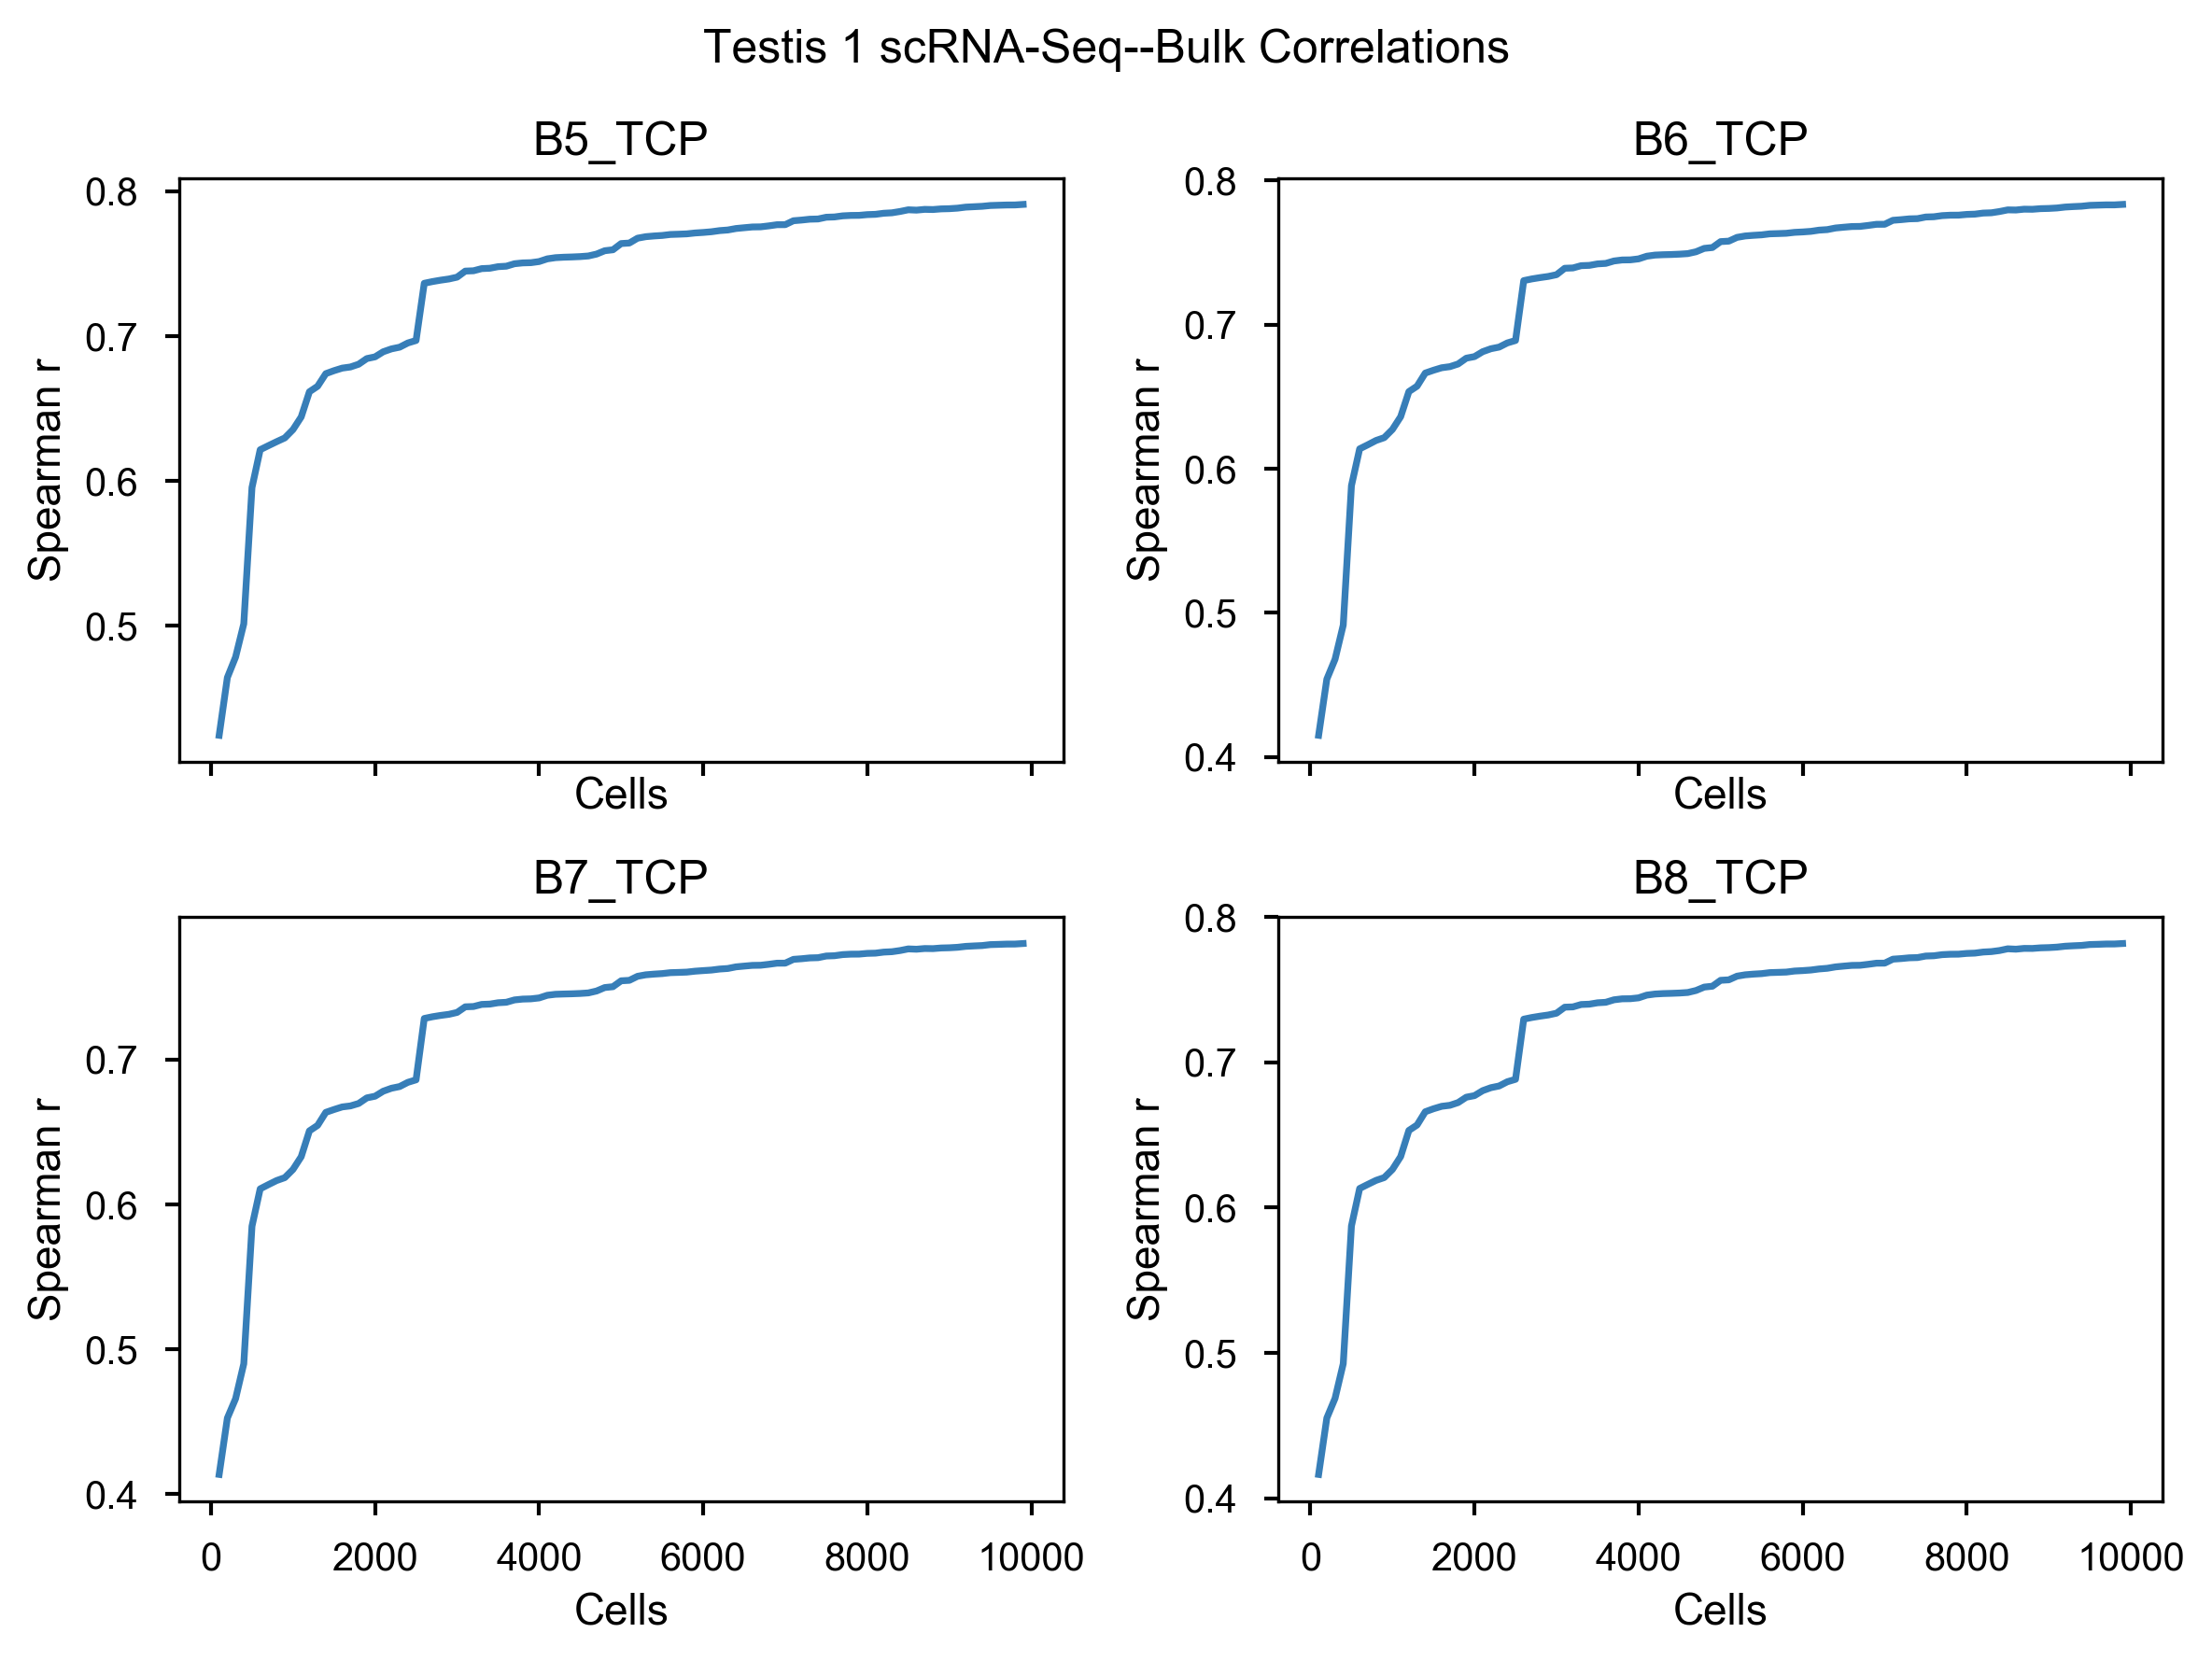

In [13]:
plot_corr_distribution(corr1)
plt.suptitle('Testis 1 scRNA-Seq--Bulk Correlations')
plt.tight_layout(rect=[0, 0, 1, .95])

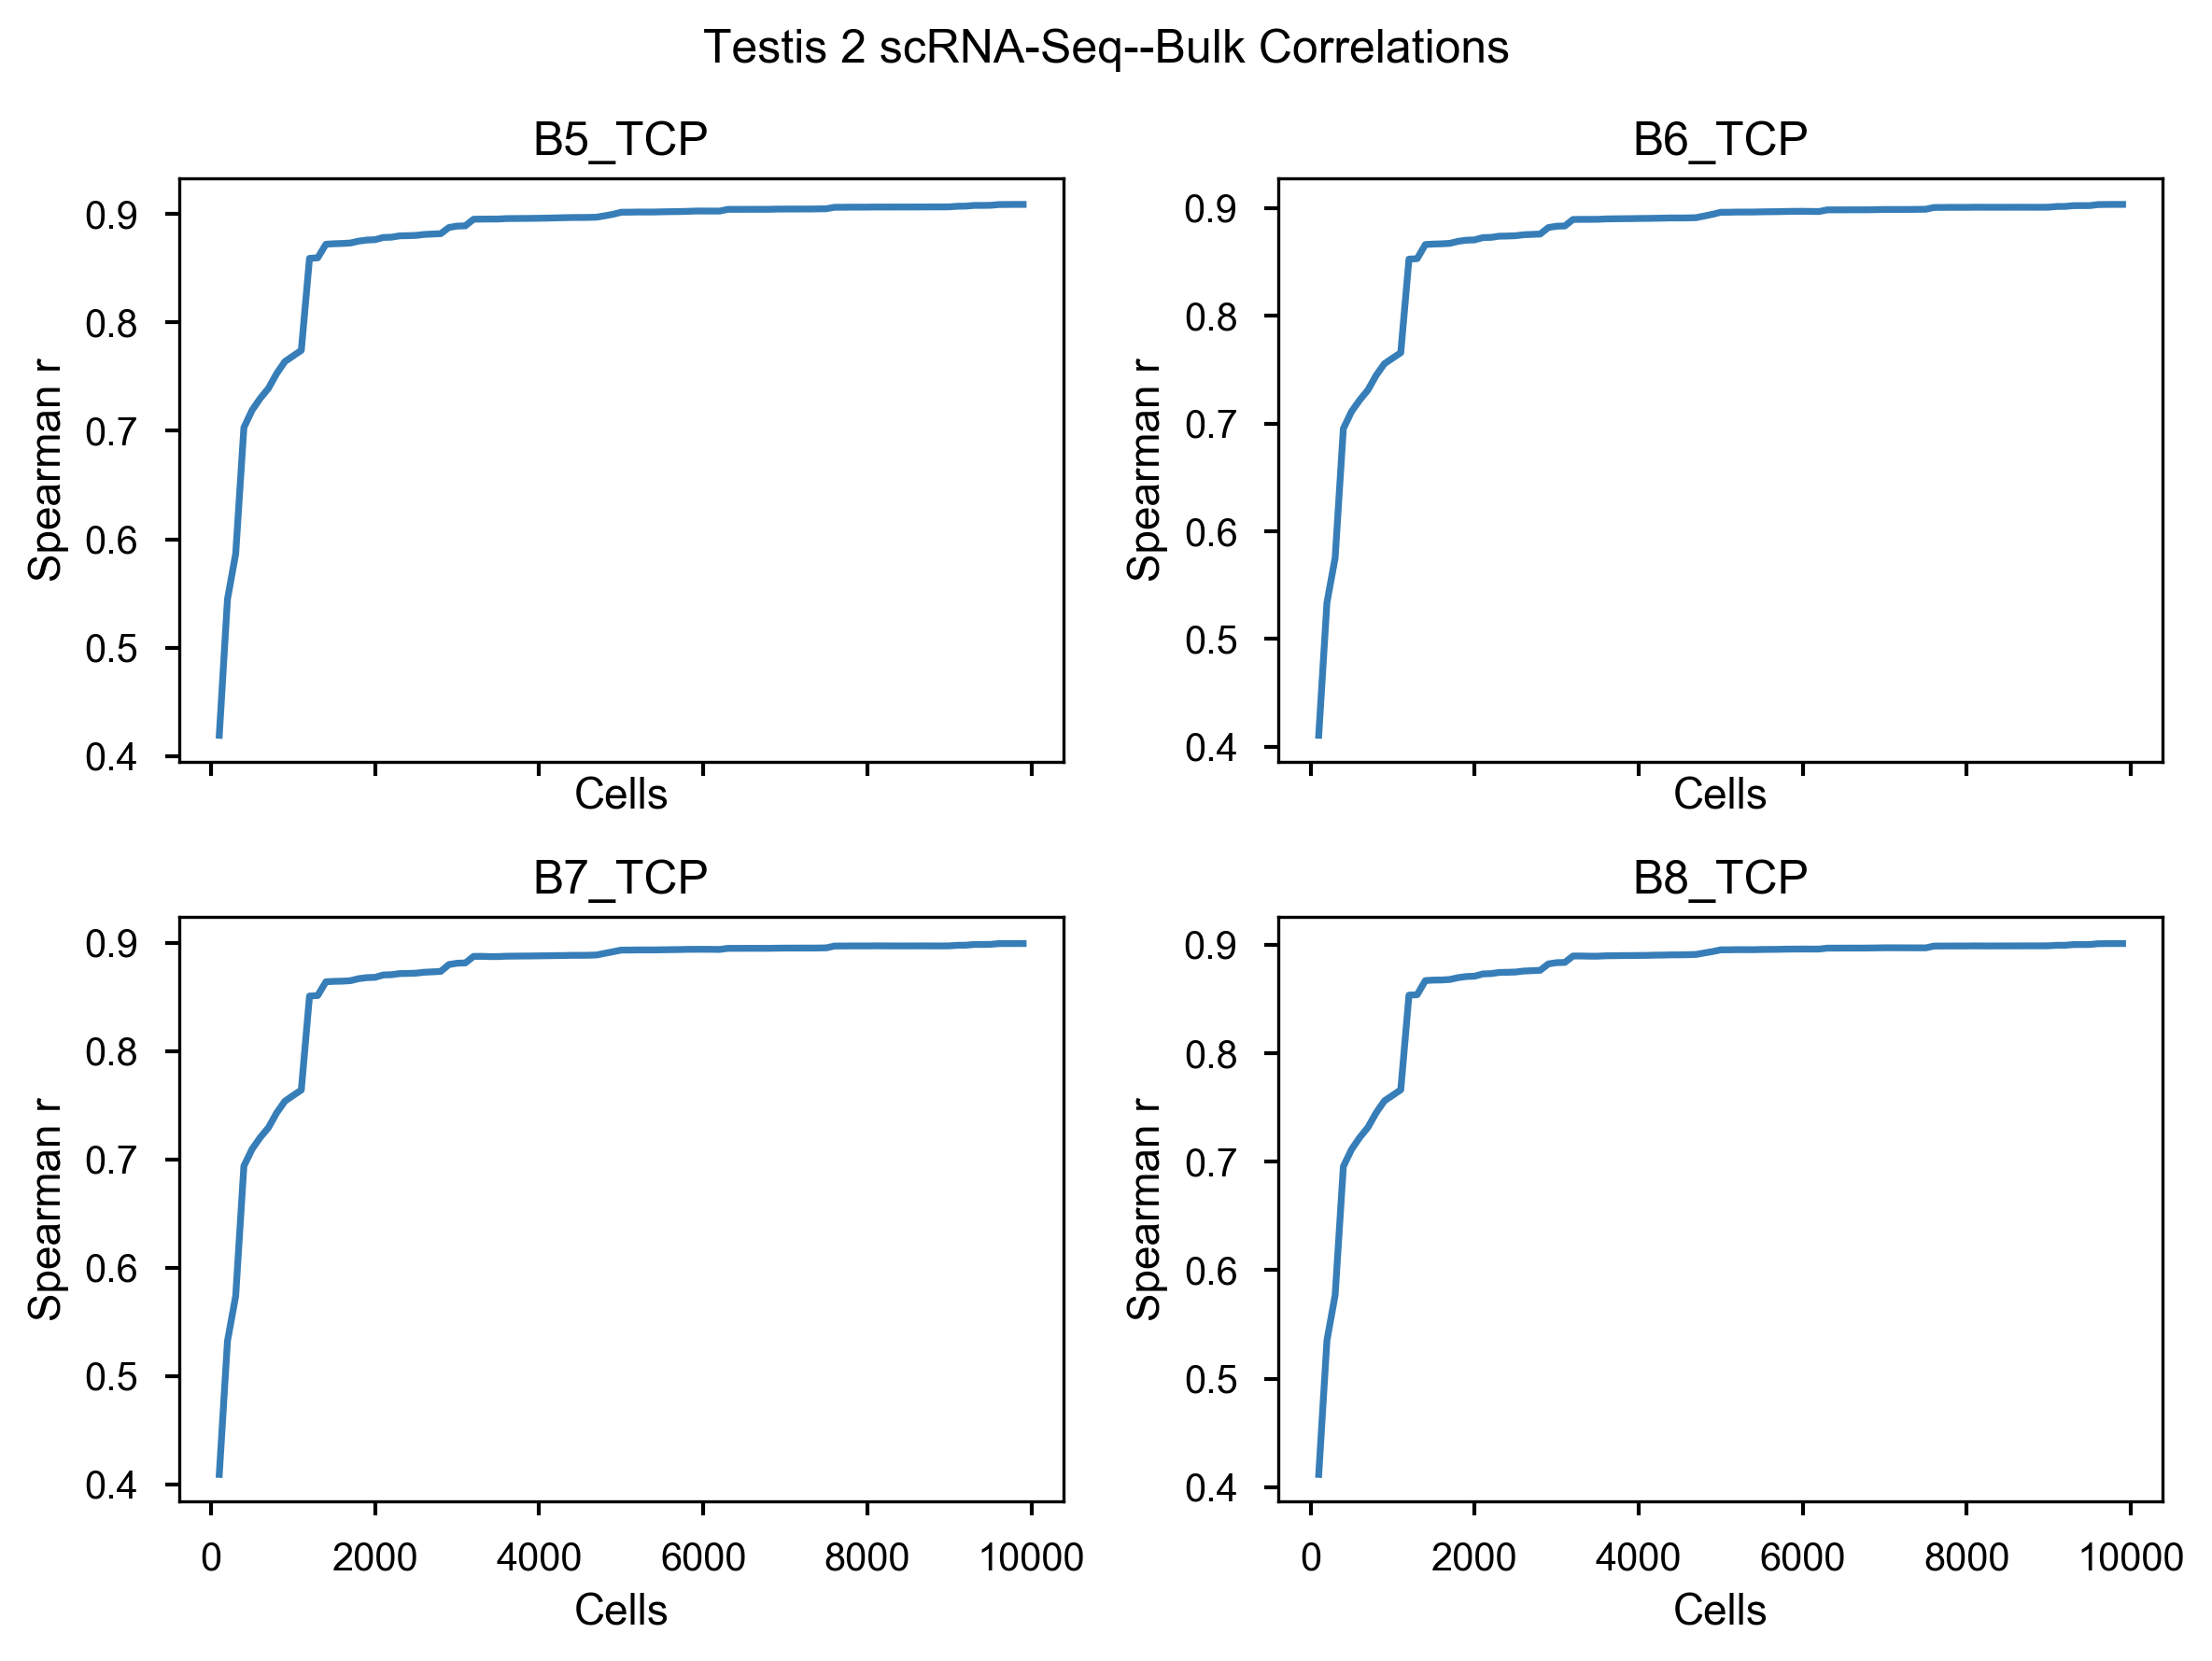

In [14]:
plot_corr_distribution(corr2)
plt.suptitle('Testis 2 scRNA-Seq--Bulk Correlations')
plt.tight_layout(rect=[0, 0, 1, .95])

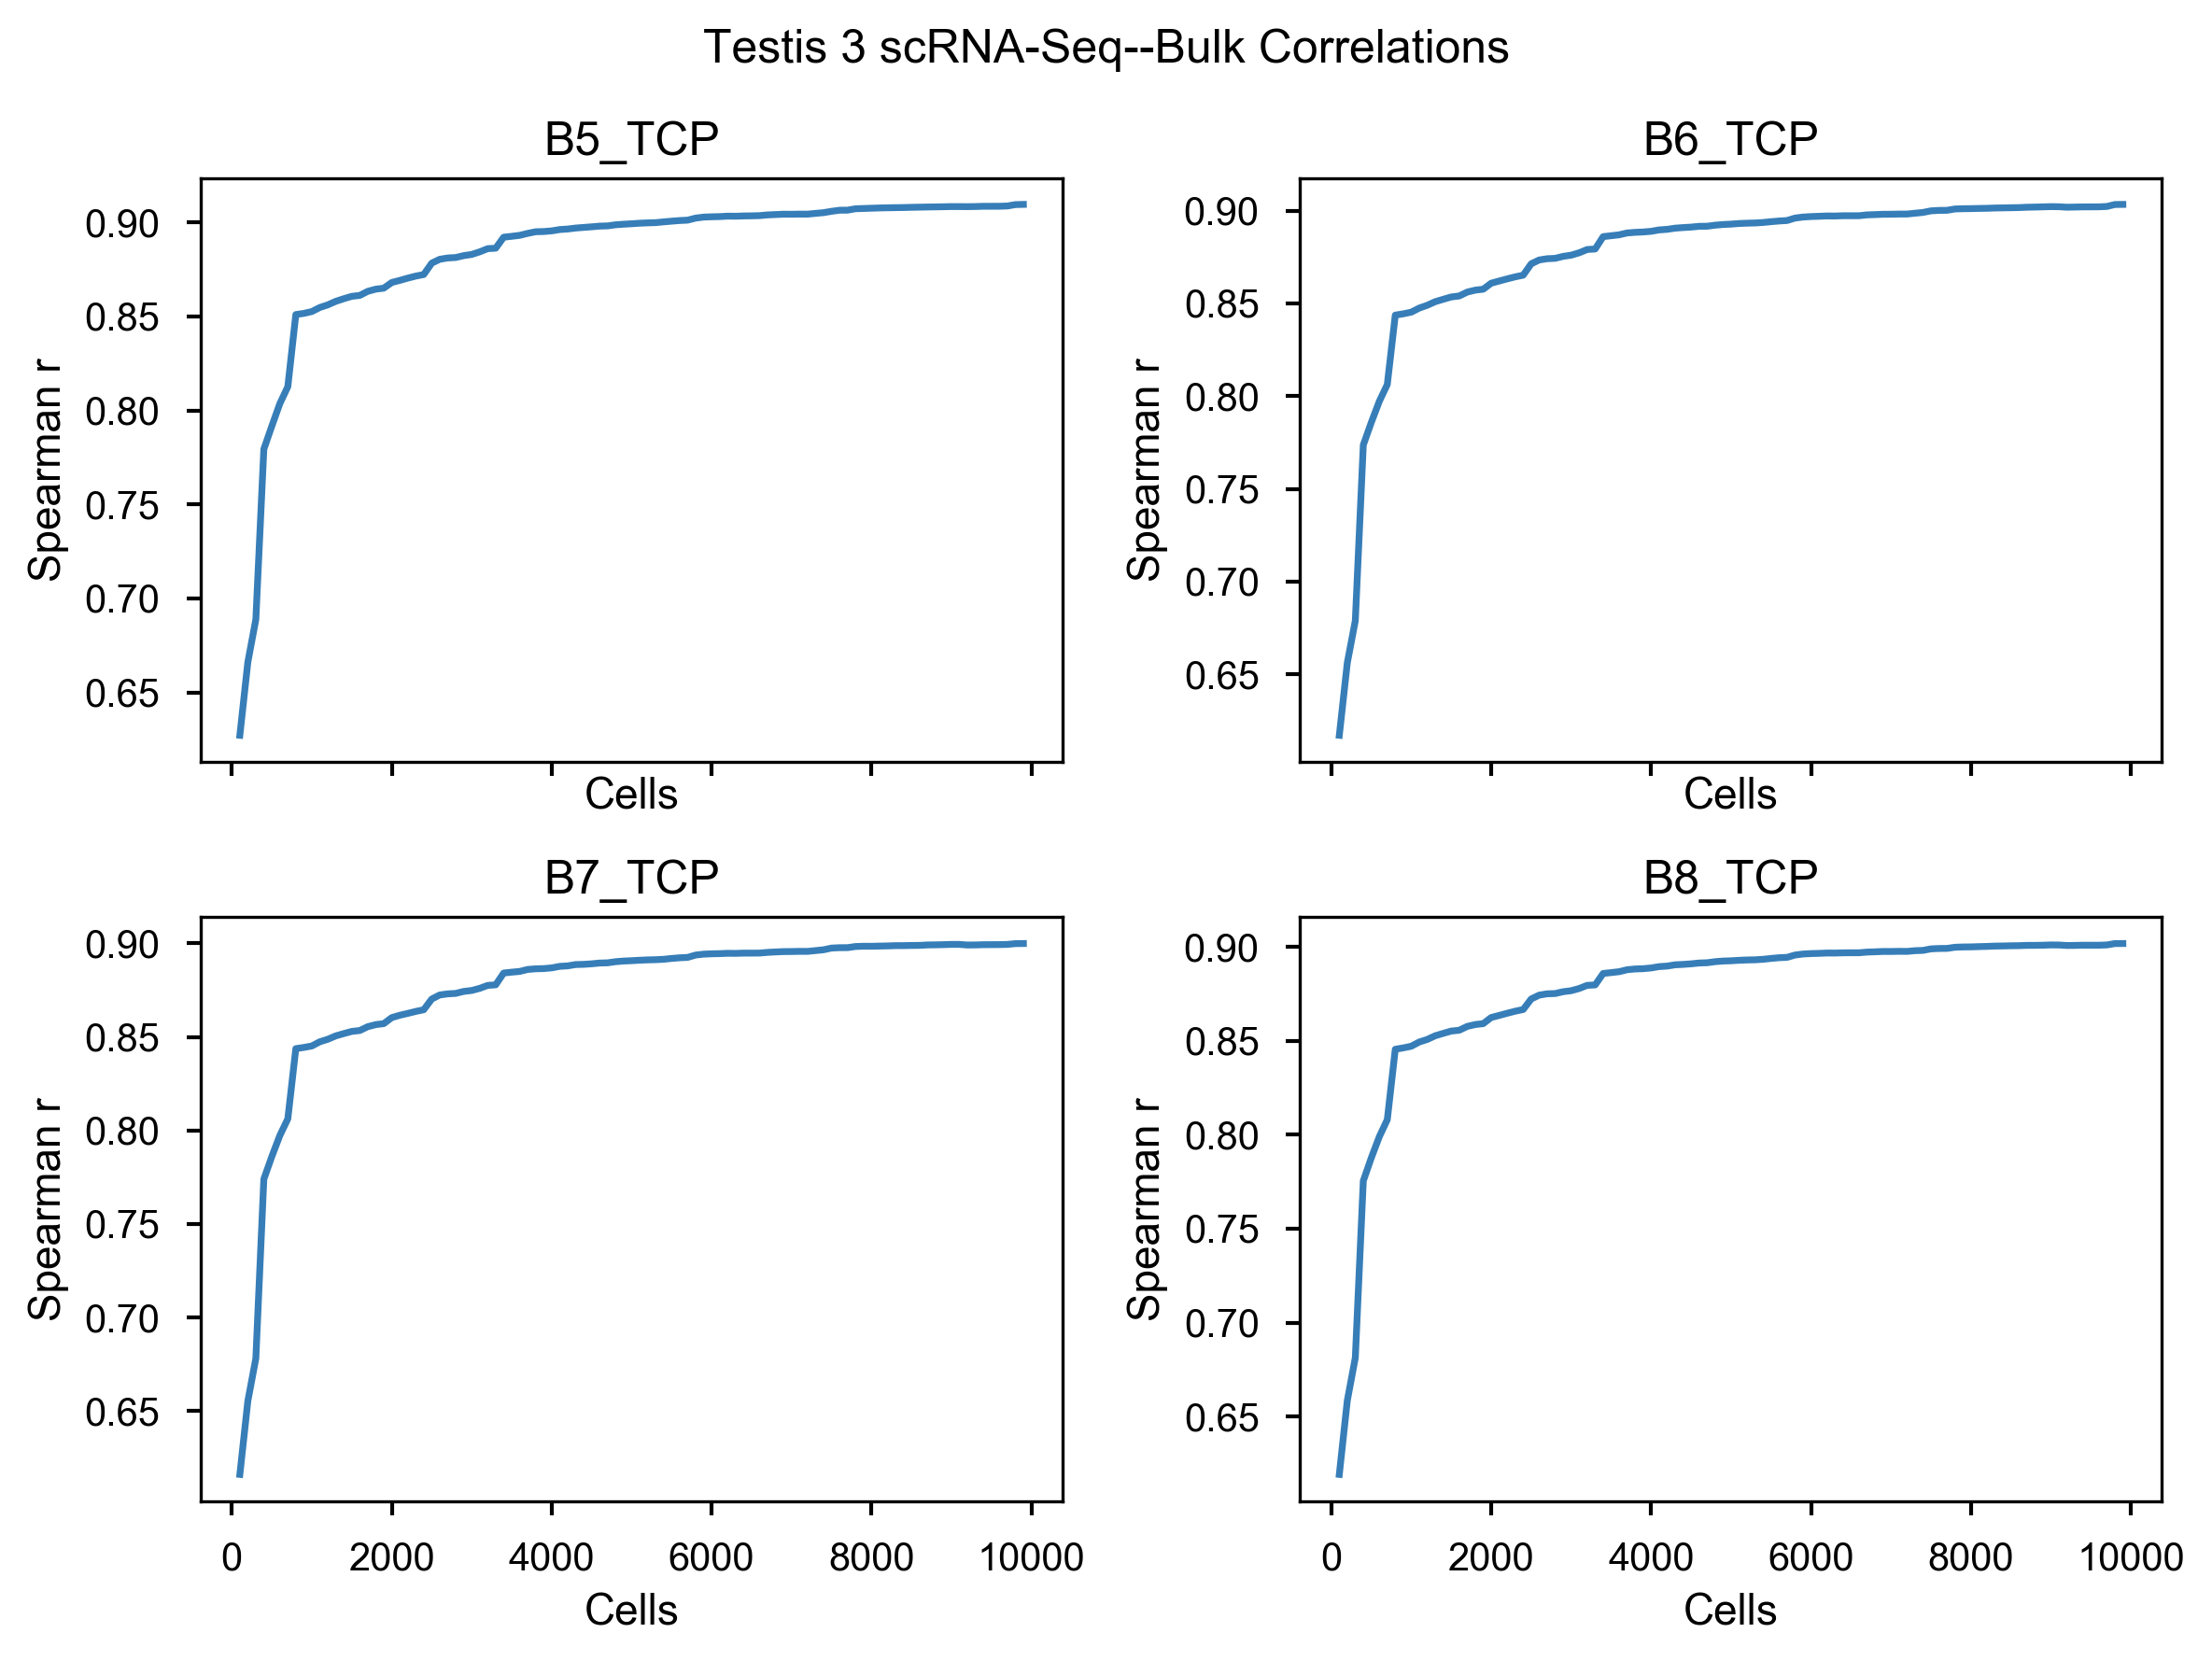

In [15]:
plot_corr_distribution(corr3)
plt.suptitle('Testis 3 scRNA-Seq--Bulk Correlations')
plt.tight_layout(rect=[0, 0, 1, .95])

In [16]:
corr_summary = pd.concat([corr1.idxmax(), corr2.idxmax(), corr3.idxmax()], axis=1)
corr_summary.columns = ['Testis1', 'Testis 2', 'Testis 3']

In [17]:
corr_summary

,Testis1,Testis 2,Testis 3
B5_TCP,9900,9800,9900
B6_TCP,9900,9900,9900
B7_TCP,9900,9900,9900
B8_TCP,9900,9900,9900
